In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [7]:
data=pd.read_csv('titanic_train.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.shape

(891, 12)

In [46]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Methods to identity Missing Data


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data.isnull().sum().sum()

866

In [24]:
data['Age'].isnull().sum()

177

In [28]:
data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [32]:
data.notnull().sum().sum()

9826

In [30]:
data['Age'].notnull().sum()

714

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
data.isna().sum().sum()

866

## Handle Missing Values (First thing to do)

### 1. Mean, median and Mode imputation

In [48]:
data1=data[['Age','Fare','Survived']]

In [50]:
data1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [54]:
data1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [56]:
def impute_method(data1,variable,method):
    data1f[variable]=df[variable].fillna(method)


In [66]:
method1=data1.Age.median()
method2=data1.Fare.median()
method3=data1.Survived.median()


In [74]:
impute_method(data1,'Age',method1)
impute_method(data1,'Fare',method2)
impute_method(data1,'Survived',method3)

/tmp/ipykernel_12641/1283979210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=df[variable].fillna(method)


In [76]:
data1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [78]:
data1.isna().sum()

Age         0
Fare        0
Survived    0
dtype: int64

### 2. Random Sample Imputation

In [81]:
data2=data[['Age','Fare','Survived']]

In [85]:
data2.isna().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [93]:
data2['Age'].isna().sum()

177

In [95]:
rand_sample=data2['Age'].dropna().sample(data2['Age'].isnull().sum(),random_state=50)

In [97]:
rand_sample

695    52.0
446    13.0
218    32.0
369    24.0
652    21.0
       ... 
787     8.0
366    60.0
255    29.0
708    22.0
188    40.0
Name: Age, Length: 177, dtype: float64

In [101]:
data2[data2['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [103]:
rand_sample.index=data2[data2['Age'].isnull()].index
rand_sample

5      52.0
17     13.0
19     32.0
26     24.0
28     21.0
       ... 
859     8.0
863    60.0
868    29.0
878    22.0
888    40.0
Name: Age, Length: 177, dtype: float64

In [105]:
def impute_nan_random(data2, variable):
    data2[variable+"_random"] = data2[variable]
    # it will have random sample to fill the na
    rand_sample = data2[variable].dropna().sample(data2['Age'].isnull().sum(),random_state = 0)
    # pandas need to have same index in order to merge the dataset
    rand_sample.index=data2[data2[variable].isnull()].index
    data2.loc[data2[variable].isnull(),variable+'_random'] = rand_sample

In [111]:
import warnings
warnings.filterwarnings('ignore')  # Suppresses all warnings

In [113]:
impute_nan_random(data2,"Age")
data2.head(2)

,Age,Fare,Survived,Age_random
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0


In [119]:
data2['Age'].fillna(data2["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [121]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         714 non-null    float64
 1   Fare        891 non-null    float64
 2   Survived    891 non-null    int64  
 3   Age_random  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


AttributeError: 'DataFrame' object has no attribute 'Age_mean'

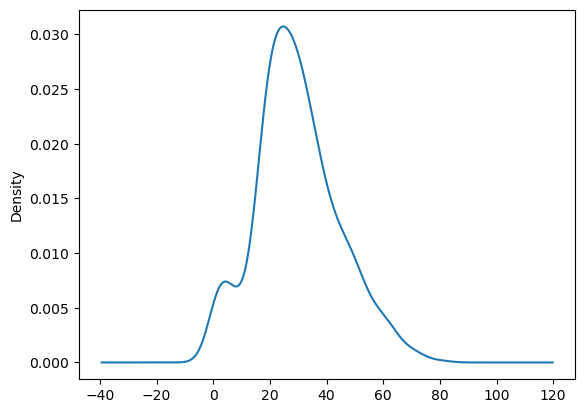

In [123]:
fig = plt.figure()
ax =  fig.add_subplot(111)
data2['Age'].plot(kind='kde', ax=ax)
data2.Age_mean.plot(kind='kde', ax=ax, color = 'black')
data2.Age_median.plot(kind='kde', ax=ax, color = 'red')
data2.Age_random.plot(kind='kde', ax=ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3. Capturing NAN values with a new feature

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data3=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])


In [10]:
data3.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [14]:
data3['Age_NUN']=np.where(data3['Age'].isnull(),1,0)

In [16]:
data3.head(2)

,Survived,Age,Fare,Age_NUN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0


In [22]:
data3[data3.Age.isnull()]

,Survived,Age,Fare,Age_NUN
5,0,NaN,8.4583,1
17,1,NaN,13.0000,1
19,1,NaN,7.2250,1
26,0,NaN,7.2250,1
28,1,NaN,7.8792,1
...,...,...,...,...
859,0,NaN,7.2292,1
863,0,NaN,69.5500,1
868,0,NaN,9.5000,1
878,0,NaN,7.8958,1


### 4. End of Distribution

In [94]:

data4 = pd.read_csv('titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

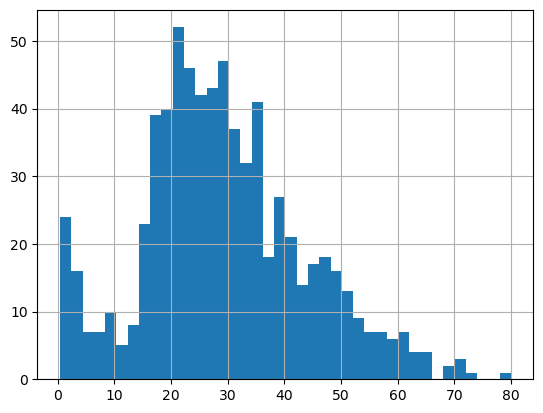

In [96]:
data4.Age.hist(bins=40)

<Axes: >

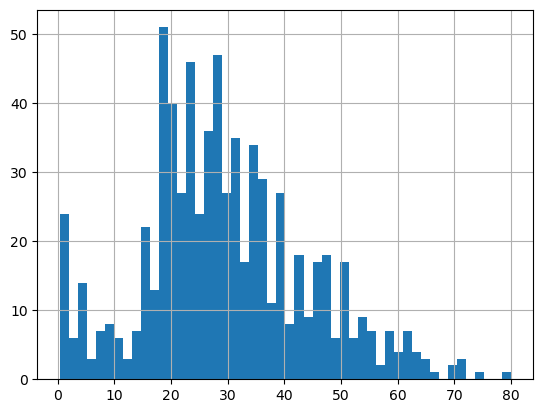

In [37]:
data4.Age.hist(bins=50)

In [98]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [100]:
# picking data 3  std away
extrem=data4.Age.mean() +3*data4.Age.std()

In [102]:
impute_nan(data4, 'Age', data4.Age.median(), extreme)

/tmp/ipykernel_40092/4150051657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median, inplace = True)


<Axes: >

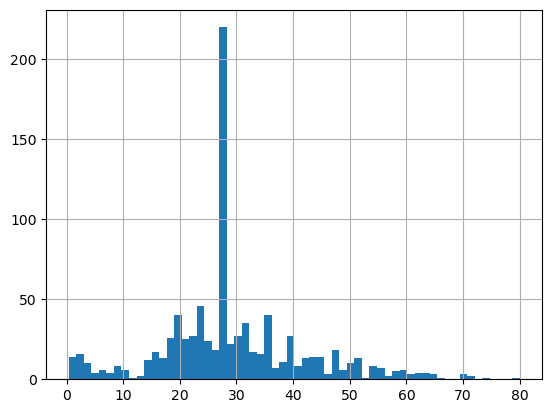

In [104]:
data4.Age.hist(bins=60)

In [106]:
data4.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

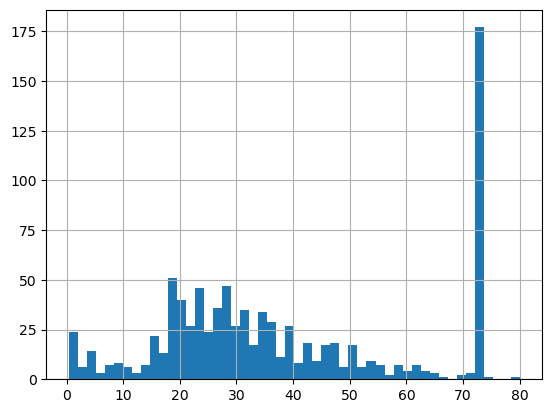

In [112]:

data4['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age'>

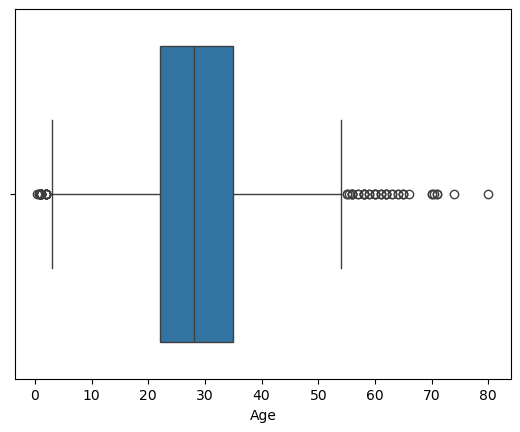

In [108]:
sns.boxplot(x='Age', data = data4)

In [110]:
extrem

73.27860964406095

### 5. Arbitary Imputation

In [62]:
data5=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [64]:
data5.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [66]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

<Axes: >

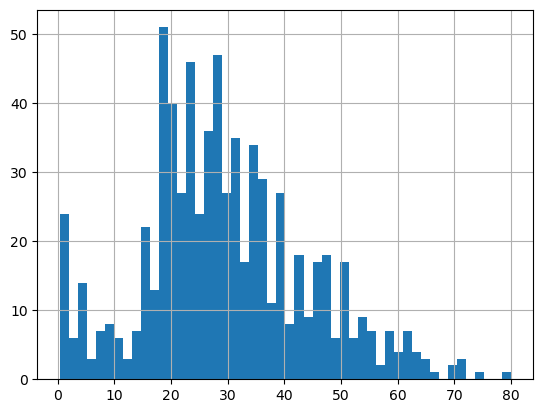

In [68]:
data5['Age'].hist(bins=50)

## Handling Categorical Features

### 6. Frequent Categorical Imputation

In [19]:
df=pd.read_csv('house_train.csv')

In [21]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
df.shape

(1460, 81)

In [43]:
data=pd.read_csv('house_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [45]:
data.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [47]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
data.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
# percentage of missing values
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<Axes: xlabel='BsmtQual'>

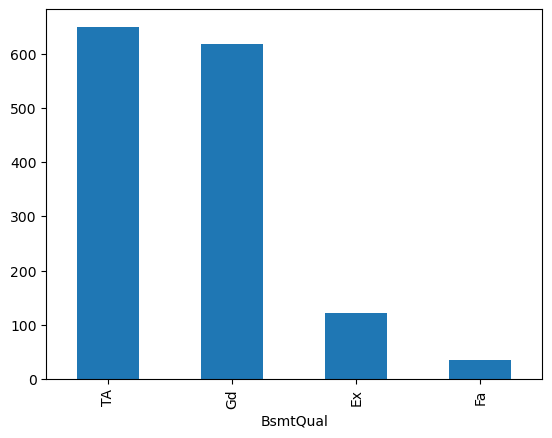

In [33]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='GarageType'>

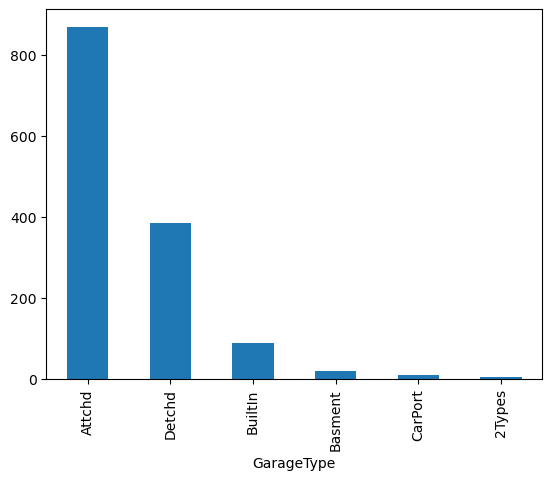

In [55]:
data['GarageType'].value_counts().plot.bar()

In [82]:
data['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [78]:
data['GarageType'].value_counts().count()

6

In [84]:
data['GarageType'].value_counts().index[0]

'Attchd'

In [90]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [92]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data,features)

/tmp/ipykernel_9065/3113500501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)
/tmp/ipykernel_9065/3113500501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [94]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [96]:
data['GarageType'].mode()[0]

'Attchd'

## Capturing NaN with new feature

In [101]:
df=pd.read_csv('house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [105]:
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [113]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [123]:
df[df['BsmtQual'].isnull()].head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
17,NaN,NaN,CarPort,90000,1
39,NaN,NaN,NaN,82000,1
90,NaN,NaN,Detchd,109900,1
102,NaN,NaN,Attchd,118964,1
156,NaN,NaN,Detchd,109500,1


In [125]:
frequent=df['BsmtQual'].mode()[0]

In [127]:
df['BsmtQual'].fillna(frequent,inplace=True)
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [139]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)
print(df)


     BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_var  FireplaceQu_var
0          Gd          Gd     Attchd     208500             0                0
1          Gd          TA     Attchd     181500             0                0
2          Gd          TA     Attchd     223500             0                0
3          TA          Gd     Detchd     140000             0                0
4          Gd          TA     Attchd     250000             0                0
...       ...         ...        ...        ...           ...              ...
1455       Gd          TA     Attchd     175000             0                0
1456       Gd          TA     Attchd     210000             0                0
1457       TA          Gd     Attchd     266500             0                0
1458       TA          Gd     Attchd     142125             0                0
1459       TA          Gd     Attchd     147500             0                0

[1460 rows x 6 columns]


/tmp/ipykernel_9065/842505985.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(frequent, inplace=True)


## suppose if you have more frequent categories , we just replace nan with a new category

In [142]:
df=pd.read_csv('house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [144]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),"missing",df[variable])

In [146]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [148]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,NaN,Attchd,142125,TA,missing,Attchd
